# Data Transformation: Dimensionality Reduction

**What is dimensionality reduction?** In data science, dimensionality reduction refers to transforming the original data set $D$ with $m$ attributes into a new data set with $m'<m$ attributes such that most of the original properties of the data set are preserved. As we have already seen, data scientists like to imagine examples (i.e., rows in the data set) as points in an $m$-dimensional space. Therefore, converting the original $m$-dimensional examples to $m'$-dimensional ones is referred to as the dimensionality reduction.

**Types of dimensionality reduction**. There are 3 ways to create new attributes from the original ones:
- linear combintion of the original attributes, $x_{new} = 3x_1 + 2x_2$
- nonlinear combination, $x_{new} = 3{x_1}^2 + cos(2x_2)$
- attribute selection, in which only a subset of the original attributes is retained

**Why is dimensionality reduction useful?** There are three main reasons -- the first is related to the computational cost, the second to facilitating the exploratory data analysis, and the third to improving the data quality. 
- *EDA*. As we have already seen, visual exploration of data is typically constrained to only a few attributes. For example, probably the most effective tool, the scatterplot, is specialized for showing only 2 attributes. With some tricks, such as playing with the shape, size, and color, it might be possible to visualize 3 or even 4 attributes in the same scatter plot without being overwhelmed. Using heatmaps, parallel plots, or multiple scatter plots could sometimes help people  grasp properties of data with up to 10 attributes. However, when dealing with data sets having 10 or more attributes, there are simply no tools that can help humans visualize the data. When we talk about data sets with thousands or even millions of attributes, it might seem that exploratory data analysis is a hopeless task. Luckily, data reduction could come to rescue. It is often possible to transform the original data set to only a few attributes, and still preserve the most important data properties. Visual analysis of the transofrmed data set could then provide invaluable insights that would not be possible in any other way.
- *Curse of Dimensionality*. Supervised learning algorithms do not like to deal with many attributes. If there are a lot of attributes most supervised learning algorithms have a tendency to overfit, i.e., do excedingly well on training data while doing poorly on test data. Reducing the number of attributes while retaining the important information about examples is the best known approach to combat the overfitting problem. 
- *Computational cost*. Many data science algorithms, some of whom we will learn in this course, are computationally costly. At best, data science algorithms scale linearly with the number of attributes, $O(m)$, but very often the scaling is quadratic, $O(m^2)$, or even worse. Since it is not uncommon to encounter data sets with thousands or even millions of attributes, without a data reduction, some of the more costly data science algorithms could be impossible to run on larger-sized data. After reduction to a sufficiently small number of attributes (the exact number might be dependent on the computational resources or on the properties of the data), even the most complex data science algorithms might become feasible on a normal computer.
- *Noise reduction*. This is a more subtle point that we will talk about later. In a nutshell, the real-life data are often noisy, and looking at any individual attribute might not provide any insight. However, if we smartly combine a large number of noisy attributes into a small set of new ones, those new attributes might reveal some useful properties of the data that are not obvious in the original data. 

# Singular Value Decomposition (SVD)

SVD is the best known and versatile approach for dimensionality reduction. For more information than is provided in this document, you can consult those Wikipedia articles:
- https://en.wikipedia.org/wiki/Singular_value_decomposition
- https://en.wikipedia.org/wiki/Low-rank_approximation
- https://en.wikipedia.org/wiki/Matrix_norm

Let us start by stating the following theorem, which is about 100 years old. 

**Theorem**. Any matrix $A_{[nxm]}$ can be expressed as $A_{[nxm]}=U_{[nxm]} \cdot S_{[mxm]} \cdot {V_{[mxm]}}^T$, where $U$ and $V$ are unitary matrices, $U \cdot U^T=I$ and $V \cdot V^T=I$, $S$ is a diagonal matrix with elements $\{s_1,s_2,...,s_m\}$, $s_1 \geq s_2 \geq ... \geq s_m$. $U$ is called the left singular matrix and its $i$-th column $u_i$ is called the $i$-th *left singular vector*. $V$ is called the right singular matrix and its $i$-th column $v_i$ is called the $i$-th *right singular vector*. $S$ is called the singular value matrix, and its $i$-th diagonal element $s_i$ is called the $i$-th *singular value*. The resulting decomposition of matrix $A$ is called the Singular Value Decompositions (SVD).

At the first glance, the theorem sounds strange and it is hard to see why it might be useful to create 3 large matrices to replace the original matrix. However, the consequences of this theorem make SVD very useful for data science.



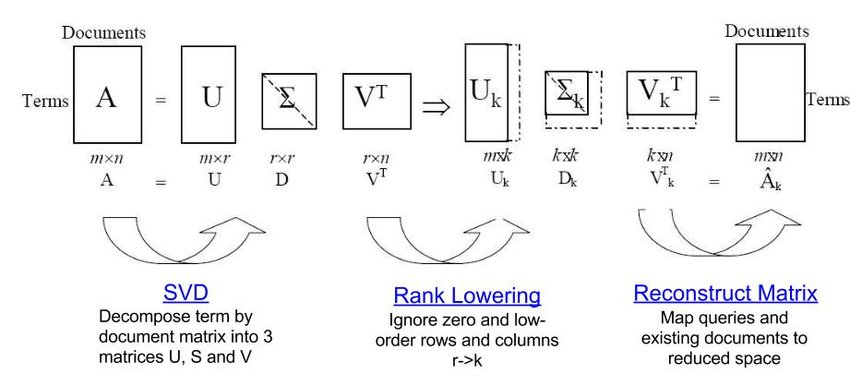
https://www.researchgate.net/figure/Singular-value-decomposition-followed-by-rank-lowering-for-latent-semantic-indexing_fig9_321025221

**Main properties of SVD**. The most important property of SVD is that it provides the best rank-$k$ approximation of matrix $A$. Here are some details:
1. Matrix $A_1 = u_1s_1{v_1}^T$ is the best rank-1 approximation of $A$. What it means is that among all imaginable matrices $X_{nxm}$ whose $rank(X) = 1$, the matrix $X$ that results in the minimal norm $|A-X|_2$ or $|A-X|_{Fro}$ is the matrix $A_1$. In other words, $A_1= \arg \min_X |A-X|_2$ and $A_1= \arg \min_X |A-X|_{Fro}$. 
2. Matrix $A_k = \sum_{i=1}^k u_is_i{v_i}^T$ it the best rank-k approximation of $A$. What it means is that among all imaginable matrices $X$ whose $rank(X) \leq k$, the matrix $X$ that results in the minimal norm $|A-X|_2$ or $|A-X|_{Fro}$ is the matrix $A_k$. In other words, $A_k= \arg \min_{X,rank(X) \leq k} |A-X|_2$ and also $A_k= \arg \min_{X,rank(X) \leq k} |A-X|_{Fro}$. Note: In the matrix notation, we can write $A_k = U_k \cdot S_k \cdot {V_k}^T$, where $U_k = U[:,1:k]$, $S_k = S[1:k,1:k]$, $V_k = V[:,1:k]$.
3. $|A-A_k|_2 = s_{k+1}$
4. $|A-A_k|_{Fro} = \sqrt{{s_{k+1}}^2+...+{s_{m}}^2}$ 
5. Columns in $A_k$ are linear combinations of columns of $U_k \cdot S_k$. By multiplying SVD equation by $V$ from right we get $A \cdot V_k = U_k \cdot S_k$. So, we have a formula how to create columns of $U_k \cdot S_k$ from the original matrix $A$ (simply by multiplying the original matrix with the right singilar vectors). Geometrically, the first column of $U_k \cdot S_k$ is a projection of data points in $A$ on the unit vector $v_k$. 

**SVD and data science**. Let us now discuss how SVD might be useful for data science:
1. *Compression -- Big Data Aspect*. If the original data set $A$ with $n$ rows and $m$ columns could be well approximated with its low-rank SVD representation $A_k$ (i.e., the requirement is that $|A-A_k| << |A|$), then instead of saving all elements of matrix $A$ ($nm$ numbers) we can save only $U_k$, $S_k$, and $V_k$ matrices (total of $nk + k + mk = O(nk)$ numbers if we assume $n > m$).
2. *Dimensionality Reduction*. Since $A_k$ is of rank $k$, this means that all its columns can be reconstructed by linear combinations of the first $k$ columns of the left singular matrix $U_k$. In this sense, we can consider $U_k$ as a $k$-dimensional version of the original data matrix $A$ that preserves the most of its original properties. Often, matrix $U_k \cdot S_k$ is used as the low-dimensional representation of $A$ instead of only $U_k$.
3. *Low-dimensional representations of examples and attributes*. Given data set $A$, we have seen that by using $U_k$ or $U_k \cdot S_k$, each example is represented as a $k$-dimensional data point instead of the original $m$-dimensional data point. By observing that $A^T = VSU^T$, we can see that $A^T$ can be represented as $V_k$ or $V_k \cdot S_k$ and that each $n$-dimensional attribute can be represented as a $k$-dimensional attribute. This aspect becomes important in analysis of some types of data, such as document-word matrices. To get specific, in document-word matrices each document is represented as a bag of words: counts of common words from a dictionary in the document. In this case, columns of $U_k$ define attributes in low-dimensional representation of documents and columns of $V_k$ define attributes in low-dimensional representation of words. For more details, see: https://en.wikipedia.org/wiki/Latent_semantic_analysis.

<img src="term-document.PNG" width="400">

        Bag-of-Words document representation
        http://mlg.postech.ac.kr/research/nmf

**Importance of normalization**. Appying SVD on $A$ differs from applying it on $A-mean(A)$. Let us imagine a 2D cloud of points that are concentrated around location (-10,10). The best rank-1 approximation of the data matrix could be obtained by $u \cdot v^T$ where $u$ is a vector of ones and $v = [-10,10]^T$. However, if the the mean of all points (i.e., (-10,10)) is subtracted from all points, the center of the cloud will move to the coordinate system center (0,0). Data scientists refer to such substraction as data normalization. Thus, the rank-1 approximation will try to capture an axis that captures the most of data variance. While in the first case the SVD is focusing on the mean of the point cloud, in the second case it focuses on a finer aspect of the data. In practice, data scientists often prefer to apply SVD on the normalized data because finding the data mean is easy. The data normalization example offers a useful lesson: the outcome of SVD can be changed after very simple transformations of data. Starting from this observation, in different domains data scientists developed specialized mathods for creating attributes, in order to allow SVD to discover the most interesting properties of the data. This in particular holds in the domain of natural language processing, where the experts proposed specialized methods for representing documents as attribute vectors (e.g., tf-idf attributes, relatative word frequencies, and so on).

**Computational cost of SVD**. The computational cost finding SVD of matrix $A_{nxm}$, where $n>m$ is $O(nm^2)$, which is the same order of magnitude as multiplying the matrix with itself, $A^TA$.

**Principal component analysis**. In data science, you will often hear about *Principal Component Analysis (PCA)*. PCA is basically the same as SVD. More specifically, PCA is an outcome of applying SVD on $A^TA$, sometimes called the covariance matrix. We can see that $A^TA = V^TS^2V$, so the left and right singular vectors of $A^TA$ are equal the same and they equal the right singular vectors of $A$. 

**Extensions**. $A$ can be rank-k approximated as $L_k \cdot {R_k}^T$, where $L_k$ is of size $n \times k$ and $R_k$ is of size $m \times k$ using algorithms that are different from SVD. The general term for SVD and the related matrix approximation methods is *matrix factorization*. For example, if $A$ has only non-negative elements, we can require both $L_k$ and $R_k$ to have non-negative elements. The resulting approach is called the non-negative matrix factorization (NMF) and is very popular in some data science applications, including documant processing. It is also possible to require that $L_k$ or $R_k$ are sparse (a large fraction of elements are zeros), which can be very useful in some applications. Sometimes, matrix $A$ is sparse itself and this allows use of very fast variants of SVD which come under the name of sparse matrix factorization. For more detail, consult: https://scikit-learn.org/stable/modules/decomposition.html.

**Nonlinear dimensionality reduction**. SVD can only produce new attributes that are linear combinations of the original attributes. However, the structure of the data often hides in nonlinear structures (e.g. imagine 2D data in a shape of letter S). There are many methods that find new attributes that are nonlinear combinations of the original attributes, that might be capable of uncovering more complex relationsihps in the data. This topic is slightly beyond this introductory course, but for now it is useful to know that technoques of this type exists and many of them have been implemented in Python and are available for your use. For more detail, consult: https://scikit-learn.org/stable/modules/manifold.html. 